

# **What factors influence post popularity?**



 ## **Introduction & Motivation**

This research investigates the factors that affect post popularity across social media platforms. Understanding these factors is crucial for marketers and content creators seeking to optimize engagement. By leveraging data-driven insights instead of intuition, they can improve content quality, choose the right platform and timing, and better connect with their target audiences. In this study, post popularity is measured using the **Engagement Rate** of each post.



**Data Source and Context**

The dataset was compiled from multiple social media platforms, including Instagram, Facebook, Twitter, and LinkedIn. It covers posts published between 2021 and 2024, spanning a variety of content types such as images, videos, and links. It also includes audience demographic attributes—such as age, gender, location, and interests—to enable a deeper analysis of engagement behavior.

However, the dataset has some limitations. Certain variables contain missing values (e.g., Influencer ID), and platform-specific audience characteristics may introduce sampling bias, which could affect the generalizability of the findings.


In [ ]:
#Installing Required Packages
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
# Importing the necessary libraries

# Import necessary libraries for data processing, visualization, and modeling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Encoders and preprocessing tools
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

# Category encoders for handling categorical variables
import category_encoders as ce


# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import drive
# Mount Google Drive to access the dataset
drive.mount('/content/drive')

# Define the path to the Excel dataset
file_path = "/content/drive/MyDrive/data_project/Working_File_Dataset.xlsx"

# Load the dataset into a DataFrame
df = pd.read_excel(file_path)

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns',None) # show all colums
df.head(12)

,Platform,Post ID,Post Type,Post Content,Post Timestamp,Date,Weekday Type,Time,Time Periods,Likes,Comments,Shares,Impressions,Reach,Engagement Rate,Audience Age,Age Group,Audience Gender,Audience Location,Audience Continent,Audience Interests,Campaign ID,Sentiment,Influencer ID
0,Instagram,16ce29c5-2dc7-478f-9814-a86754f3ce8b,Video,Increase fast partner south.,2023-07-30 06:40:06.356,2023-07-30,Weekend,2023-07-30 06:40:06.356,Morning,908,125,85,3884,1223,91.414554,48,Senior Adults,Male,Greece,Europe,population,NaN,Neutral,NaN
1,Facebook,a30c948b-0fb3-4e92-95da-e2dea184f568,Link,Floor glass bring indicate seem detail.,2022-06-19 14:15:59.833,2022-06-19,Weekend,2022-06-19 14:15:59.833,Afternoon,604,29,2,1831,1386,45.815296,33,Mature Adults,Female,Lao People's Democratic Republic,Asia,attorney,98705a1e-2573-4cb8-983b-2112d4b140c9,Mixed,NaN
2,Twitter,aee74d06-c775-459c-8fc4-013ce25644f1,Image,Customer stop language everybody rest chance me.,2022-06-04 06:19:50.403,2022-06-04,Weekend,2022-06-04 06:19:50.403,Morning,288,230,56,3927,2516,22.813990,23,Adolescent Adults,Other,Jordan,Asia,affect,NaN,Positive,NaN
3,Instagram,80415748-a509-4fc6-8b55-74f2babe5dac,Image,Town find identify game your.,2022-05-12 15:41:21.902,2022-05-12,Weekday,2022-05-12 15:41:21.902,Afternoon,870,92,15,4829,1377,70.951344,48,Senior Adults,Male,Sudan,Africa,money,6b15bf9b-14cc-4ab9-9168-56322057b61e,Positive,NaN
4,LinkedIn,14d34185-639a-4508-a8b6-02a743fe0dbc,Link,Seem strategy you cup.,2023-10-26 20:53:33.135,2023-10-26,Weekday,2023-10-26 20:53:33.135,Evening,573,192,19,2797,1949,40.225757,40,Mature Adults,Male,Gabon,Africa,part,NaN,Negative,NaN
5,Twitter,4fb57935-8d9b-4386-ae17-ee955a2e848d,Link,Inside name charge management adult.,2024-01-17 15:38:38.798,2024-01-17,Weekday,2024-01-17 15:38:38.798,Afternoon,430,223,86,3265,2813,26.270885,33,Mature Adults,Other,Afghanistan,Asia,several,NaN,Neutral,NaN
6,Twitter,d38fb961-2499-4488-a127-b6624e63f4dd,Image,Late event guess price.,2022-07-12 08:53:48.613,2022-07-12,Weekday,2022-07-12 08:53:48.613,Morning,973,309,164,3917,3404,42.479436,34,Mature Adults,Female,Moldova,Europe,husband,NaN,Neutral,NaN
7,Facebook,91c4a56f-b710-4272-9fae-df8932aa8d72,Image,Attack agency benefit good.,2021-08-21 05:48:54.172,2021-08-21,Weekend,2021-08-21 05:48:54.172,Night,137,327,141,4631,1010,59.900990,18,Adolescent Adults,Male,Hong Kong,Asia,coach,NaN,Mixed,020d4653-f752-4176-a694-21b10355604e
8,Facebook,b500076f-b136-4e13-818d-9ef714790f4d,Image,Company street those return.,2022-04-12 16:30:04.264,2022-04-12,Weekday,2022-04-12 16:30:04.264,Afternoon,658,36,128,3626,3258,25.230203,47,Senior Adults,Other,Rwanda,Africa,standard,NaN,Negative,NaN
9,Facebook,14ca12b7-e129-4cd8-8612-b9ede3064b47,Link,Mind still page food memory.,2023-07-02 10:57:10.730,2023-07-02,Weekend,2023-07-02 10:57:10.730,Morning,352,476,104,4242,1436,64.902507,47,Senior Adults,Male,United States Virgin Islands,NorthAmerica,born,NaN,Mixed,NaN


## **Dataset Analysis**

### **1. Dataset Overview:**

The dataset includes approximately 100,000 observations (posts) and 24 variables. The primary target variable is **Engagement Rate**, a continuous metric that quantifies how actively users interact with each post.


In [ ]:
# Get the number of rows (observations) and columns (variables) in the dataset
num_rows, num_columns = df.shape
print(f"Number of observations (rows): {num_rows}")
print(f"Number of variables (columns): {num_columns}")

# Display the names of all columns in the dataset
print("\nColumn names:")
print(df.columns.tolist())


Number of observations (rows): 100000
Number of variables (columns): 24

Column names:
['Platform', 'Post ID', 'Post Type', 'Post Content', 'Post Timestamp', 'Date', 'Weekday Type', 'Time', 'Time Periods', 'Likes', 'Comments', 'Shares', 'Impressions', 'Reach', 'Engagement Rate', 'Audience Age', 'Age Group', 'Audience Gender', 'Audience Location', 'Audience Continent', 'Audience Interests', 'Campaign ID', 'Sentiment', 'Influencer ID']


### **2. Variable Dictionary:**

This section provides an overview of the dataset’s structure by listing each variable, its data type, and the number of missing values. This helps identify features that may require cleaning or transformation before modeling.


In [ ]:
# Display detailed information about each variable, including data types and non-null counts
print("\nData Info:")
print(df.info())

# Check and display the number of missing values in each variable
print("\nMissing values per column:")
print(df.isnull().sum())




Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Platform            100000 non-null  object        
 1   Post ID             100000 non-null  object        
 2   Post Type           100000 non-null  object        
 3   Post Content        100000 non-null  object        
 4   Post Timestamp      100000 non-null  datetime64[ns]
 5   Date                100000 non-null  datetime64[ns]
 6   Weekday Type        100000 non-null  object        
 7   Time                100000 non-null  datetime64[ns]
 8   Time Periods        100000 non-null  object        
 9   Likes               100000 non-null  int64         
 10  Comments            100000 non-null  int64         
 11  Shares              100000 non-null  int64         
 12  Impressions         100000 non-null  int64         
 13  Reach             

### **3.	Descriptive Statistics:**

This section summarizes the distribution of both numerical and categorical variables to better understand the data.


In [ ]:
# 3.1 Numeric variables:
"""
Key statistics such as count, mean, standard deviation,
min, and max for all numerical features.
"""

print("\nSummary statistics (numeric variables):")
print(df.describe())



Summary statistics (numeric variables):
                      Post Timestamp                        Date  \
count                         100000                      100000   
mean   2022-09-09 03:59:54.133313024  2022-09-08 15:57:49.824000   
min       2021-03-08 19:13:37.452000         2021-03-08 00:00:00   
25%    2021-12-08 15:02:33.308250112         2021-12-08 00:00:00   
50%    2022-09-09 14:43:13.860499968         2022-09-09 00:00:00   
75%    2023-06-11 07:30:04.047500032         2023-06-11 00:00:00   
max       2024-03-08 11:33:25.534000         2024-03-08 00:00:00   
std                              NaN                         NaN   

                                Time          Likes       Comments  \
count                         100000  100000.000000  100000.000000   
mean   2022-09-09 03:59:54.133313024     499.396240     249.699200   
min       2021-03-08 19:13:37.452000       0.000000       0.000000   
25%    2021-12-08 15:02:33.308250112     249.000000     124.000000

In [ ]:
# 3.2 Categorical variables:
"""
Frequency count for the most common categories in each categorical
variable (up to the top 10 categories).
"""
print("\nCategorical Variables Frequency:")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts().head(10))


Categorical Variables Frequency:

Value counts for 'Platform':
Platform
Twitter      25160
LinkedIn     25126
Facebook     24879
Instagram    24835
Name: count, dtype: int64

Value counts for 'Post ID':
Post ID
1630fb12-a0b9-48d4-940e-bbccdd320084    1
22382750-fd41-4689-a181-6315c9d57f40    1
419f60fc-2f67-4532-94bf-144f7da3fd04    1
af6a28b5-0cba-4c0f-ae70-862c6e2fd61a    1
d9ba357e-46c5-4017-a462-53b58e70db9c    1
8961a570-755e-44e6-a44b-674a8c20b765    1
d6344d88-94e3-4222-8dff-dff20848b062    1
ad06285e-8e7a-42ab-9594-83593e0f8dba    1
c8a141c6-3fdd-4e27-9499-0c39b8ad5fd6    1
261f09f4-37dc-4c30-a946-632d8094aff4    1
Name: count, dtype: int64

Value counts for 'Post Type':
Post Type
Video    33384
Link     33338
Image    33278
Name: count, dtype: int64

Value counts for 'Post Content':
Post Content
Any accept recognize mouth go.                            1
Along impact find happy.                                  1
Reach represent mention already more nor relationship.    1
Upo

### **4. Distributions & Visualizations:**

Visualizing the distribution of both categorical and numerical variables helps us identify patterns, detect class imbalances, and understand the shape of the data before modeling.


Post Count and Percentage by Platform:

           Count  Percentage
Platform                    
Twitter    25160       25.16
LinkedIn   25126       25.13
Facebook   24879       24.88
Instagram  24835       24.83


/tmp/ipython-input-9-3890408142.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Platform', palette='Set2', order=platform_summary.index)


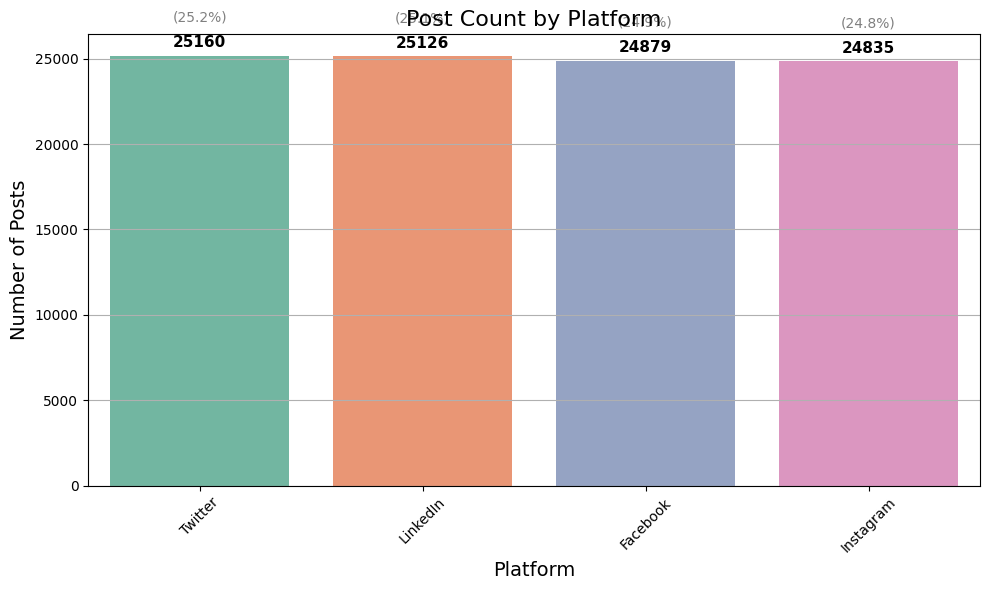

Post Count and Percentage by Sentiment:

           Count  Percentage
Sentiment                   
Mixed      50100       50.10
Positive   16738       16.74
Neutral    16645       16.64
Negative   16517       16.52


/tmp/ipython-input-9-3890408142.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Sentiment', palette='Set1', order=sentiment_counts.index)


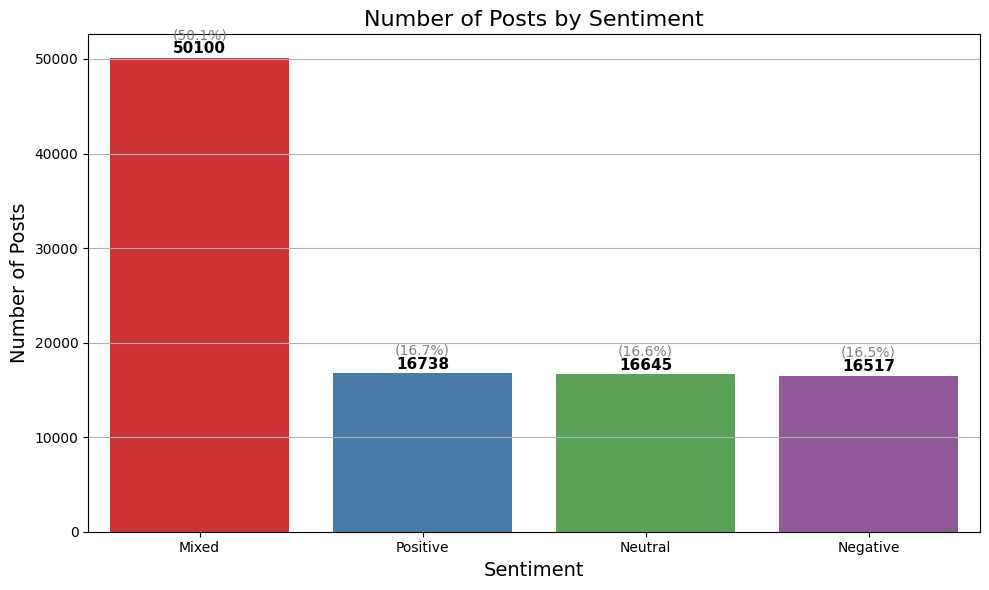

In [ ]:
# 4.1. Categorical Variables (Bar Chart)
# Analyzing the distribution of posts by platform

platform_counts = df['Platform'].value_counts()
platform_percentages = df['Platform'].value_counts(normalize=True) * 100

# Creating a summary table of post counts and percentages by platform
platform_summary = pd.DataFrame({
    'Count': platform_counts,
    'Percentage': platform_percentages.round(2)
})

print("Post Count and Percentage by Platform:\n")
print(platform_summary)
# print(check_class_imbalance(platform_counts)) # Removed the call to undefined function

# Plotting a bar chart showing the number and percentage of posts by platform
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Platform', palette='Set2', order=platform_summary.index)
plt.title('Post Count by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.xticks(rotation=45)

# Adding count and percentage labels to the bars
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percent = count / total * 100
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()

    ax.text(x, y + total * 0.005, f'{count}', ha='center', fontsize=11, weight='bold')
    ax.text(x, y + total * 0.02, f'({percent:.1f}%)', ha='center', fontsize=10, color='gray')

plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Analyzing the distribution of posts by sentiment
sentiment_counts = df['Sentiment'].value_counts()
sentiment_percentages = df['Sentiment'].value_counts(normalize=True) * 100

print("Post Count and Percentage by Sentiment:\n")
print(pd.DataFrame({'Count': sentiment_counts, 'Percentage': sentiment_percentages.round(2)}))
# print(check_class_imbalance(sentiment_counts)) # Removed the call to undefined function

# Plotting a bar chart showing the number and percentage of posts by sentiment
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Sentiment', palette='Set1', order=sentiment_counts.index)
plt.title('Number of Posts by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.xticks(rotation=0)

# Adding count and percentage labels to the bars
for p in ax.patches:
    count = int(p.get_height())
    percent = count / total * 100
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()

    ax.text(x, y + total * 0.005, f'{count}', ha='center', fontsize=11, weight='bold')
    ax.text(x, y + total * 0.02, f'({percent:.1f}%)', ha='center', fontsize=10, color='gray')

plt.tight_layout()
plt.grid(axis='y')
plt.show()



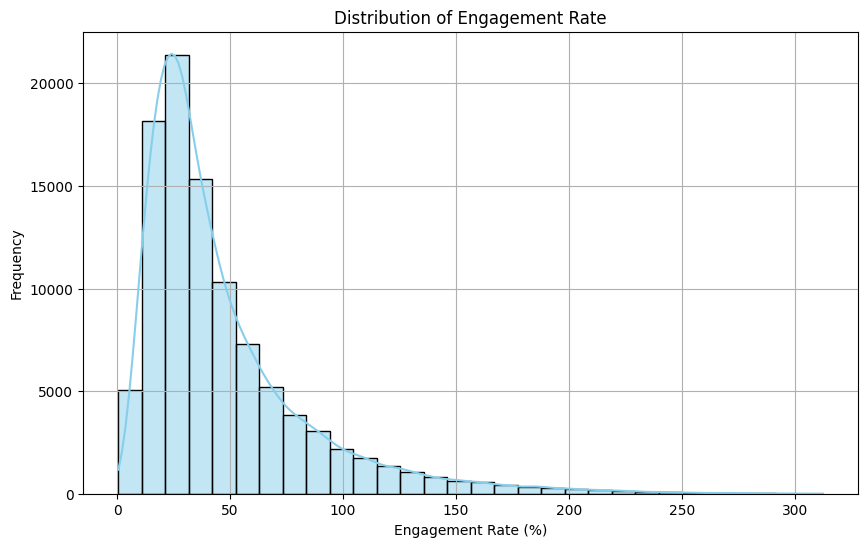

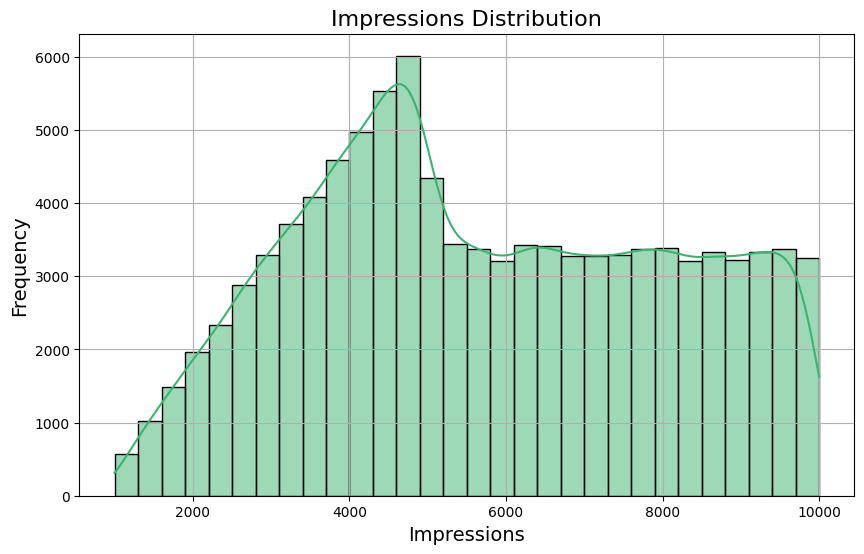

In [ ]:
# 4.2. Numeric Variables (Histograms)
# Plotting histograms to visualize the distribution of numeric variables

# Histogram for Engagement Rate
plt.figure(figsize=(10, 6))
sns.histplot(df['Engagement Rate'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram for Impressions
plt.figure(figsize=(10, 6))
sns.histplot(df['Impressions'], bins=30, kde=True, color='mediumseagreen')
plt.title('Impressions Distribution', fontsize=16)
plt.xlabel('Impressions', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


## **Data Preprocessing and Cleaning**

Before model development, we conducted a comprehensive data preprocessing phase to ensure the quality, consistency, and relevance of the dataset.





### **1.	Handling missing values:**

We check for missing values in the dataset to understand the extent of incomplete data. The code calculates both the number and percentage of missing values per column and displays only those columns with missing entries.



In [ ]:
# Calculate the number of missing values per column, sorted by descending order
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# Calculate the percentage of missing values for each column
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Display the percentage of missing values for columns that have missing data
print("\nPercentage of missing values per column:")
print(missing_percent)


Percentage of missing values per column:
Influencer ID    90.006
Campaign ID      79.868
dtype: float64


When the percentage of missing values in a column exceeds 20%, we consider that variable too incomplete for reliable analysis. Therefore, such columns are typically removed from the dataset to avoid introducing bias or reducing model performance due to excessive imputation.


In [ ]:
# Drop the unnecessary columns to clean the dataset
columns_to_drop = ['Campaign ID', 'Influencer ID']
df = df.drop(columns=columns_to_drop)


### **2. Removal of Non-Predictive or Problematic Features:**

To reduce noise, improve interpretability, and prevent data leakage, we excluded variables that are either identifiers, unstructured text, or components directly used to compute the target.


**Removed Features and Rationale:**
* **Likes, Comments, Shares, Reach**: These are used to calculate the Engagement Rate (target), so including them would cause leakage.

* **Post Content**: A highly unique text field requiring NLP techniques beyond this project's scope.

* **Audience Location, Audience Interests**: High-cardinality features with sparse distribution, hard to encode meaningfully.

* **Post ID, Campaign ID, Influencer ID**: Identifiers with no predictive value that can lead to overfitting.


In [ ]:
# Drop irrelevant or problematic columns
columns_to_drop = [
    'Post ID', 'Likes', 'Comments', 'Shares', 'Reach',
    'Date', 'Time', 'Audience Location', 'Audience Interests', 'Post Content'
]
df = df.drop(columns=columns_to_drop, errors='ignore')


### **3. Feature Extraction from Timestamp:**

We extracted useful time-based features from the post timestamp to enrich the data with temporal patterns.

In [ ]:
# Convert timestamp to datetime and extract time components
df['Post Timestamp'] = pd.to_datetime(df['Post Timestamp'], errors='coerce')
df['Post Hour'] = df['Post Timestamp'].dt.hour
df['Post DayOfWeek'] = df['Post Timestamp'].dt.dayofweek
df['Post Month'] = df['Post Timestamp'].dt.month

# Drop the original timestamp column
df = df.drop(columns=['Post Timestamp'])


## **Problem Formulation: Regression and Classification**

To address the research question from two complementary perspectives, we formulated two predictive modeling tasks:

- **Regression Task**: Predict the continuous **Engagement Rate** of a post.
- **Classification Task**: Categorize posts into **Engagement Classes** (Low / Medium / High) based on the Engagement Rate.

We created two clean copies of the dataset:
- `df_reg`: used for the regression task.
- `df_class`: used for the classification task.

In [ ]:
# Create copies for each modeling task

df_reg = df.copy()

df_class = df.copy()




## ***PART A – Regression Modeling***






## **Data Preprocessing (Regression):**

This section describes the preprocessing steps applied to prepare the data for regression modeling.



### **1.	Resolving class imbalance (if applicable):**

Since the target variable (**Engagement Rate**) is continuous, class imbalance is not relevant. This concept applies only to classification problems where the target consists of distinct class labels.





In [ ]:
#Class Imbalance (Not Applicable)

### **2.	Encoding Categorical Variables:**


To enable machine learning models to interpret categorical data, we applied appropriate encoding techniques:

- **Ordinal Encoding**: Used for ordered categories such as *Age Group* (Adolescent Adults < Mature Adults < Senior Adults).
- **One-Hot Encoding**: Used for nominal variables with no inherent order (e.g., Platform, Post Type, Sentiment).

We also ensured all missing values in the *Age Group* column were filled with the lowest meaningful category prior to encoding.




In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal Encoding
"""
Applies ordinal encoding to a categorical column based on a defined order.
Parameters:
  df (DataFrame): The input dataset.
  feature_name (str): The column to encode.
  category_order (list): Ordered categories (low to high).

Returns:
  DataFrame: The updated dataset with the column encoded.

Notes:
  Skips encoding if the column is missing, already encoded, or has unexpected values.
"""
def safe_ordinal_encode(df, feature_name, category_order):
    if feature_name not in df.columns:
        print(f" Column '{feature_name}' not found – skipping encoding.")
        return df

    df[feature_name] = df[feature_name].astype(str)
    unique_values = set(df[feature_name].unique())
    expected_values = set(category_order)

    if unique_values <= expected_values:
        encoder = OrdinalEncoder(categories=[category_order])
        df[feature_name] = encoder.fit_transform(df[[feature_name]])
        print(f" '{feature_name}' encoded successfully.")
    elif unique_values <= set(['0.0', '1.0', '2.0']):
        print(f" '{feature_name}' appears to be already encoded – skipping.")
    else:
        print(f" Unexpected values in '{feature_name}': {unique_values - expected_values}")
        print("Encoding skipped to avoid incorrect transformation.")
    return df

# One-Hot Encoding
"""
Applies one-hot encoding to selected categorical columns.
Parameters:
  df (DataFrame): The input dataset.
  columns_to_encode (list): List of columns to encode.
  drop_first (bool): Drop the first category to avoid multicollinearity.

Returns:
 DataFrame: The updated dataset with one-hot encoded columns.

Notes:
  Ignores missing columns and returns the original dataset if none are valid.
"""
def safe_one_hot_encode(df, columns_to_encode, drop_first=True):
    valid_columns = [col for col in columns_to_encode if col in df.columns]
    if not valid_columns:
        print(" No valid categorical columns found for one-hot encoding.")
        return df
    df_encoded = pd.get_dummies(df, columns=valid_columns, drop_first=drop_first, dtype=int)
    print(f" One-hot encoding completed for: {valid_columns}")
    return df_encoded


# Apply Ordinal Encoding to Age Group
age_group_order = ['Adolescent Adults', 'Mature Adults', 'Senior Adults']
df_reg = safe_ordinal_encode(df_reg, 'Age Group', age_group_order)


# Define categorical columns to encode
one_hot_features = [
    'Platform', 'Post Type', 'Weekday Type', 'Time Periods',
    'Audience Gender', 'Audience Continent', 'Sentiment'
]

# Apply safe one-hot encoding
df_reg_encoded = safe_one_hot_encode(df_reg, one_hot_features)

#  Final output
print("Encoding completed successfully. Encoded dataframe shape:", df_reg_encoded.shape)
print(df_reg_encoded.head())


### **3.	Correlation Analysis:**

To understand relationships between variables and guide feature selection, we calculated correlation matrices and visualized them using heatmaps.




In [ ]:
# 3.1.Full Correlation Matrix:
"""
Computed correlations between all numeric and encoded features.
Visualized using a full heatmap to provide a general overview.
"""
correlation_matrix = df_reg_encoded.corr(numeric_only=True)

# Display heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap (After Encoding and Feature Removal)", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# 3.2.Filtered Correlation Matrix:
"""
Removed features with more than 99% zeros to reduce noise from sparse one-hot encoded variables.
Calculated a cleaner correlation matrix using the remaining relevant features.
"""

#Filter columns with less than 1% non-zero values
non_zero_percent = (df_reg_encoded != 0).mean()
filtered_cols = non_zero_percent[non_zero_percent > 0.01].index

#Select only relevant columns
filtered_df = df_reg_encoded[filtered_cols]
numeric_cols = filtered_df.select_dtypes(include='number').columns

#Calculate correlation matrix
correlation_matrix_filtered = filtered_df[numeric_cols].corr()

#Display heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_filtered, cmap='coolwarm', linewidths=0.5, annot=True)
plt.title("Filtered Correlation Heatmap (Non-Sparse Features)", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
#3.3. Top Correlated Pair:
# Finding the strongest correlation (excluding self-correlation)
corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = corr_pairs[(corr_pairs < 1.0)].drop_duplicates()

top_pair = high_corr_pairs.idxmax()
top_value = high_corr_pairs.max()

print(f"\nHighest absolute correlation is between: {top_pair[0]} and {top_pair[1]} → {top_value:.2f}")

### **4.	Train/Test Splitting Strategy (Regression):**



This regression task aims to predict the Engagement Rate a continuous variable based on various post characteristics and audience demographics. The goal is to train a model that generalizes well to unseen data.

To achieve this, the dataset was split into training and test sets as follows:

* Training Set (80%): Used to fit the model and optimize parameters.

* Test Set (20%): Held out for final evaluation to assess model performance on unseen data.




In [ ]:
from sklearn.model_selection import train_test_split

# Define the target variable and feature matrix
X_reg = df_reg_encoded.drop(columns=['Engagement Rate'])
y_reg = df_reg_encoded['Engagement Rate']

In [ ]:
# Split into training (80%) and test (20%) sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42, shuffle=True
)

# Output the number of samples
print(f"Training samples: {X_train_reg.shape[0]}")
print(f"Test samples: {X_test_reg.shape[0]}")

### **5.	Standardizing the data (Regression):**


Numeric features were standardized to ensure they have a mean of 0 and standard deviation of 1.
This prevents scale-sensitive models from being biased by feature magnitude.
To avoid data leakage, scaling was fit on the training set and applied to both train and test sets.






In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both train and test sets
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# (Optional) Convert back to DataFrame for readability
X_train_reg_scaled = pd.DataFrame(X_train_reg_scaled, columns=X_train_reg.columns)
X_test_reg_scaled = pd.DataFrame(X_test_reg_scaled, columns=X_test_reg.columns)



## **Feature Engineering and Selection(Regression):**

Feature Selection and Model Optimization Using RFECV and SVR (Regression Task):


To improve predictive accuracy and reduce model complexity, we performed feature selection using Recursive Feature Elimination with Cross-Validation (RFECV) with a RandomForestRegressor.
The selected features were then used to train a Support Vector Regressor (SVR) optimized via GridSearchCV.

This two-stage process enables the identification of impactful features and fine-tuning of the SVR model for maximum performance.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Defining the model for feature selection
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)

# RFECV for feature selection
rfecv = RFECV(
estimator=rf_model,
step=1,
scoring='r2',
cv=cv_inner,
n_jobs=-1
)
rfecv.fit(X_train_reg_scaled, y_train_reg)

# Getting the feature names selected by RFECV
selected_feature_names = X_train_reg_scaled.columns[rfecv.support_]
print("Features selected by RFECV with RandomForest:")
print(selected_feature_names.tolist())

# New sets with only selected features
X_train_best = X_train_reg_scaled[selected_feature_names]
X_test_best = X_test_reg_scaled[selected_feature_names]

# Pipeline definition with SVR
pipe = Pipeline([
('scaler', StandardScaler()), # Important for SVR
('svr', SVR())
])

# Parameter range
param_grid = {
'svr__C': [0.1, 1, 10],
'svr__epsilon': [0.01, 0.1, 0.5],
'svr__kernel': ['rbf', 'linear']
}

# GridSearch with Cross-Validation
grid = GridSearchCV(
estimator=pipe,
param_grid=param_grid,
scoring='r2',
cv=5,
n_jobs=-1
)

# Train GridSearch on the reduced training set
grid.fit(X_train_best, y_train_reg)

# Print the results
print("Best parameters in GridSearch:")
print(grid.best_params_)
print("Best R² result (training set):")
print(grid.best_score_)

# Test on the test set
test_score = grid.score(X_test_best, y_test_reg)
print("R² on the test set:")
print(test_score)

# Save for later evaluation
best_model_svr = grid.best_estimator_
selected_features_svr = selected_feature_names
X_train_svr = X_train_best
X_test_svr = X_test_best


## **Modelling Experiments (Regression):**


### **1. Gradient Boosting Regression:**








In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline with scaler and Gradient Boosting model
pipe_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('gbr', GradientBoostingRegressor(random_state=42))
])

# Parameter range
param_grid_gb = {
    'gbr__n_estimators': [100, 200],
    'gbr__learning_rate': [0.05, 0.1, 0.2],
    'gbr__max_depth': [3, 5, 7],
    'gbr__subsample': [0.8, 1.0]
}

# Cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_gb = GridSearchCV(
    estimator=pipe_gb,
    param_grid=param_grid_gb,
    scoring='r2',
    cv=cv,
    n_jobs=-1
)


# Train on the entire training set (including all features)
grid_gb.fit(X_train_reg_scaled, y_train_reg)

# Save the best model and test set
best_model_gb = grid_gb.best_estimator_
X_test_gb = X_test_reg_scaled

# Print results
print("\nBest hyperparameters for Gradient Boosting model:")
print(grid_gb.best_params_)

print("\nR² on test set:")
print(best_model_gb.score(X_test_gb, y_test_reg))

#### The importance of Gradient Boosting features








In [ ]:
# Retrieve a gradient model from the pipeline
gbr_model = best_model_gb.named_steps['gbr']

# Get the original feature names (as in X_train)
feature_names = X_train_reg.columns
importances = gbr_model.feature_importances_

# Match the length (for safety)
min_len = min(len(feature_names), len(importances))
feat_imp_df = pd.DataFrame({
'feature': feature_names[:min_len],
'importance': importances[:min_len]
})

# Sort by importance
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

print("\nImportance of features in the Gradient Boosting model:")
print(feat_imp_df)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'], color='teal')
plt.xlabel("Feature Importance", fontsize=12)
plt.title("Gradient Boosting - Feature Importance", fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### **2. RIDGE:**








In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd


# RFECV with Ridge for feature selection
ridge_model = Ridge(alpha=1.0, random_state=42)

# Cross-validation strategy
cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)

rfecv = RFECV(
    estimator=ridge_model,
    step=1,
    scoring='r2',
    cv=cv_inner,
    n_jobs=-1
)

rfecv.fit(X_train_reg_scaled, y_train_reg)

# Get the selected features
selected_features_ridge = X_train_reg_scaled.columns[rfecv.support_]
print("\nFeatures selected by RFECV with Ridge Regression:")
print(selected_features_ridge.tolist())

# Create a training and test set with only the selected features
X_train_ridge = X_train_reg_scaled[selected_features_ridge]
X_test_ridge = X_test_reg_scaled[selected_features_ridge]

# GridSearchCV to find the best alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge(max_iter=10000, random_state=42)
grid = GridSearchCV(ridge, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid.fit(X_train_ridge, y_train_reg)

# Print the search results
print("\nBest Alpha:", grid.best_params_)
print("\nBest R² in CV:", grid.best_score_)

# Estimate on the test set
best_model_ridge = grid.best_estimator_
y_pred_ridge = best_model_ridge.predict(X_test_ridge)

mae = mean_absolute_error(y_test_reg, y_pred_ridge)
mse = mean_squared_error(y_test_reg, y_pred_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_ridge)

print("\nEvaluation on Test Set:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")



### **3. MLPRegressor:**








In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Model definition
mlp = MLPRegressor(max_iter=500, random_state=42)

# Parameter range
param_grid_mlp = {
    'hidden_layer_sizes': [(50,50), (100,), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'activation': ['relu', 'tanh']
}

# GridSearchCV
grid_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid_mlp,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fit on X_train_reg_scaled
grid_mlp.fit(X_train_reg_scaled, y_train_reg)

# Save model best
best_model_mlp = grid_mlp.best_estimator_

# Save the appropriate test set
X_test_mlp = X_test_reg_scaled # All features, as in the training phase

# Print performance
print("\nBest hyperparameters for MLPRegressor:")
print(grid_mlp.best_params_)

print("\nR² on test set:")
print(best_model_mlp.score(X_test_mlp, y_test))



### **4. LASSO:**








In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler


# Basic model definition
lasso_model = Lasso(max_iter=10000, random_state=42)

# Cross-validation strategy
cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)

# RFECV for feature selection
rfecv = RFECV(
    estimator=lasso_model,
    step=1,
    scoring='r2',
    cv=cv_inner,
    n_jobs=-1
)


# Training set fitting
rfecv.fit(X_train_reg_scaled, y_train_reg)

# Feature names Selected
selected_features_lasso = X_train_reg_scaled.columns[rfecv.support_]
print("\nFeatures selected by RFECV with Lasso:")
print(selected_features_lasso.tolist())

# Creating reduced sets
X_train_lasso = X_train_reg_scaled[selected_features_lasso]
X_test_lasso = X_test_reg_scaled[selected_features_lasso]

# GridSearchCV for optimal alpha search
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}


grid = GridSearchCV(
    estimator=Lasso(max_iter=10000, random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fit on the reduced training set
grid.fit(X_train_lasso, y_train_reg)

# Save the best model
best_model_lasso = grid.best_estimator_

# Results
print("\nBest alpha selected:")
print(grid.best_params_)

print("\nAverage R² score in CV:")
print(grid.best_score_)

# Estimate on the test set
test_score = best_model_lasso.score(X_test_lasso, y_test_reg)
print("\nR² on test set:")
print(test_score)


## **Model Evaluation (Regression):**


### **1. Metric Selection:**


For the regression task, we selected the following metrics:

- **Mean Absolute Error (MAE):** Measures the average magnitude of prediction errors without considering their direction. It provides a straightforward interpretation of how much the predictions deviate from actual values on average. MAE is robust to outliers and easy to interpret.

- **Mean Squared Error (MSE):** Represents the average of the squared differences between predicted and actual values. MSE penalizes larger errors more strongly, making it sensitive to outliers.

- **Root Mean Squared Error (RMSE):** The square root of the MSE, offering an error metric in the same units as the target variable. RMSE emphasizes large errors more than MAE and is useful when large deviations are particularly undesirable.

- **R² Score (Coefficient of Determination):** Indicates the proportion of variance in the target variable explained by the model. A higher R² implies a better fit to the data.


These metrics together offer a comprehensive understanding of model performance from different perspectives.







### **2. Results Reporting:**


We evaluated five regression models using the selected metrics. The table below presents their scores:











In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Model evaluation function
"""
Evaluates a regression model using standard performance metrics.

Parameters:
  name (str): The name of the model.
  model (object): The trained regression model with a .predict() method.
  X_test (array-like): Test features.
  y_test_reg (array-like): True target values.

Returns:
  dict: A dictionary containing the model name, MAE, MSE, RMSE, and R² score, each rounded to 4 decimal places.
"""
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return {
        'Model': name,
        'MAE': round(mae, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4),
        'R²': round(r2, 4)
    }


# Evaluate all models
results = []

results.append(evaluate_model("Random Forest", best_model_svr, X_test_svr, y_test_reg))
results.append(evaluate_model("Gradient Boosting", best_model_gb, X_test_gb, y_test_reg))
results.append(evaluate_model("Ridge", best_model_ridge, X_test_ridge, y_test_reg))
results.append(evaluate_model("Lasso", best_model_lasso, X_test_lasso, y_test_reg))
results.append(evaluate_model("MLP Regressor", best_model_mlp, X_test_mlp, y_test_reg))

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("The model evaluation table:")
display(results_df)

#### **Results Reporting (continued): Visual Comparison of R² Scores**

To enhance interpretability and support comparative analysis, we plotted a bar chart showing the R² scores across all evaluated models.

This visualization provides a quick, intuitive understanding of how each model performed in terms of explanatory power.


In [ ]:
import matplotlib.pyplot as plt

# Visual comparison of R² scores
results_df.plot(
    x='Model',
    y='R²',
    kind='bar',
    title='Comparison of R² Scores Across Models',
    legend=False,
    figsize=(8, 5),
    color='skyblue'
)
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **3. Statistical Insight - Target Distribution:**

We examined the distribution of the target variable (Engagement Rate) to assess normality and symmetry.
This helps determine the suitability of certain models and whether data transformations are needed.














In [ ]:
# import seaborn as sns
# sns.histplot(y, bins=50, kde=True)


import seaborn as sns

sns.histplot(y, bins=50, kde=True)
plt.title("Distribution of Target Variable (Engagement Rate)")
plt.xlabel("Engagement Rate")
plt.ylabel("Count")
plt.grid(True)
plt.show()

### **4. Error & Residual Analysis:**

To better understand prediction behavior, we plotted the predicted vs. actual values for the best-performing model (Gradient Boosting).
We also examined residuals and the largest prediction errors.













#### **Statistical Insight - Target Distribution:**

We examined the distribution of the target variable (Engagement Rate) to assess normality and symmetry.
This helps determine the suitability of certain models and whether data transformations are needed.














In [ ]:
# Predicted vs Actual for Best Model (Gradient Boosting)
best_model_name = results_df.sort_values(by='R²', ascending=False).iloc[0]['Model']
print(f"Best performing model: {best_model_name}")

y_pred_best = best_model_gb.predict(X_test_gb)

plt.figure(figsize=(6, 6))
plt.scatter(y_test_reg, y_pred_best, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual Engagement Rate (y_test_reg)')
plt.ylabel('Predicted Engagement Rate (y_pred)')
plt.title('Predicted vs. Actual Engagement Rate for Gradient Boosting Model')
plt.grid(True)
plt.tight_layout()
plt.show()

# (Optional) Residual plot:
residuals = y_test_reg - y_pred_best

plt.figure(figsize=(7, 5))
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Values (Gradient Boosting)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()





## ***PART B – Classification Modeling***









## **Data Preprocessing (Classification):**




To address the classification version of the research question, we transformed the original regression target (Engagement Rate)
into a categorical variable named 'Engagement Class', representing three engagement levels: Low, Medium, and High.
This enables the application of supervised classification algorithms.

In [ ]:
# Convert Engagement Rate into categorical Engagement Class

# Use qcut to divide Engagement Rate into 3 quantile-based bins
df_class['Engagement Class'] = pd.qcut(df_class['Engagement Rate'], q=3, labels=['Low', 'Medium', 'High'])

# Check class distribution
print("Engagement Class distribution:")
print(df_class['Engagement Class'].value_counts())

Engagement Class distribution:
Engagement Class
Medium    33334
Low       33333
High      33333
Name: count, dtype: int64


### **1.	Resolving class imbalance (if applicable):**


This step checks whether the target  (**Engagement Class**) are evenly distributed across the dataset. Detecting class imbalance is important, as it may bias the model toward the majority classes. In our case, no significant imbalance was found, so no correction was needed.




In [ ]:
# Calculate count and percentage per class
engagement_dist = df_class['Engagement Class'].value_counts().sort_index()
engagement_percent = (engagement_dist / len(df_class)) * 100

# Combine into one DataFrame
engagement_summary = pd.DataFrame({
    'Count': engagement_dist,
    'Percentage': engagement_percent.round(2)
})

print("Engagement Class distribution:\n")
print(engagement_summary)

# Optional: flag imbalance
if engagement_percent.max() - engagement_percent.min() > 10:
    print("\n Warning: Potential class imbalance detected.")
else:
    print("\n No significant class imbalance.")

Engagement Class distribution:

                  Count  Percentage
Engagement Class                   
Low               33333       33.33
Medium            33334       33.33
High              33333       33.33

 No significant class imbalance.


### **2.	Encoding Categorical Variables:**


To enable machine learning models to interpret categorical data, we applied appropriate encoding techniques:

- **Ordinal Encoding**: Used for ordered categories such as *Age Group* (Adolescent Adults < Mature Adults < Senior Adults).
- **One-Hot Encoding**: Used for nominal variables with no inherent order (e.g., Platform, Post Type, Sentiment).

We also ensured all missing values in the *Age Group* column were filled with the lowest meaningful category prior to encoding.




In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal Encoding
"""
Applies ordinal encoding to a categorical column based on a defined order.
Parameters:
  df (DataFrame): The input dataset.
  feature_name (str): The column to encode.
  category_order (list): Ordered categories (low to high).

Returns:
  DataFrame: The updated dataset with the column encoded.

Notes:
  Skips encoding if the column is missing, already encoded, or has unexpected values.
"""
def safe_ordinal_encode(df, feature_name, category_order):
    if feature_name not in df.columns:
        print(f" Column '{feature_name}' not found – skipping encoding.")
        return df

    df[feature_name] = df[feature_name].astype(str)
    unique_values = set(df[feature_name].unique())
    expected_values = set(category_order)

    if unique_values <= expected_values:
        encoder = OrdinalEncoder(categories=[category_order])
        df[feature_name] = encoder.fit_transform(df[[feature_name]])
        print(f" '{feature_name}' encoded successfully.")
    elif unique_values <= set(['0.0', '1.0', '2.0']):
        print(f" '{feature_name}' appears to be already encoded – skipping.")
    else:
        print(f" Unexpected values in '{feature_name}': {unique_values - expected_values}")
        print("Encoding skipped to avoid incorrect transformation.")
    return df

# One-Hot Encoding
"""
Applies one-hot encoding to selected categorical columns.
Parameters:
  df (DataFrame): The input dataset.
  columns_to_encode (list): List of columns to encode.
  drop_first (bool): Drop the first category to avoid multicollinearity.

Returns:
 DataFrame: The updated dataset with one-hot encoded columns.

Notes:
  Ignores missing columns and returns the original dataset if none are valid.
"""
def safe_one_hot_encode(df, columns_to_encode, drop_first=True):
    valid_columns = [col for col in columns_to_encode if col in df.columns]
    if not valid_columns:
        print(" No valid categorical columns found for one-hot encoding.")
        return df
    df_encoded = pd.get_dummies(df, columns=valid_columns, drop_first=drop_first, dtype=int)
    print(f" One-hot encoding completed for: {valid_columns}")
    return df_encoded


# Apply Ordinal Encoding to Age Group
age_group_order = ['Adolescent Adults', 'Mature Adults', 'Senior Adults']
df_class = safe_ordinal_encode(df_class, 'Age Group', age_group_order)


# Define categorical columns to encode
one_hot_features = [
    'Platform', 'Post Type', 'Weekday Type', 'Time Periods',
    'Audience Gender', 'Audience Continent', 'Sentiment'
]

# Apply safe one-hot encoding
df_class_encoded = safe_one_hot_encode(df_class, one_hot_features)

#  Final output
print("Encoding completed successfully. Encoded dataframe shape:", df_class_encoded.shape)
print(df_class_encoded.head())


 'Age Group' encoded successfully.
 One-hot encoding completed for: ['Platform', 'Post Type', 'Weekday Type', 'Time Periods', 'Audience Gender', 'Audience Continent', 'Sentiment']
Encoding completed successfully. Encoded dataframe shape: (100000, 28)
   Impressions  Engagement Rate  Audience Age  Age Group  Post Hour  \
0         3884        91.414554            48        2.0          6   
1         1831        45.815296            33        1.0         14   
2         3927        22.813990            23        0.0          6   
3         4829        70.951344            48        2.0         15   
4         2797        40.225757            40        1.0         20   

   Post DayOfWeek  Post Month Engagement Class  Platform_Instagram  \
0               6           7             High                   1   
1               6           6           Medium                   0   
2               5           6              Low                   0   
3               3           5             

### **3.	Train/Test Splitting Strategy (Classification):**



This classification task aims to predict the engagement class (Low, Medium, High) based on various post characteristics and audience demographics.

To ensure fair evaluation, the dataset was split into:
- Training Set (80%): Used to train the models and perform hyperparameter tuning.
- Test Set (20%): Held out to evaluate model generalization on unseen data.

Stratified sampling was applied to maintain the original class distribution across both sets.


In [ ]:
from sklearn.model_selection import train_test_split

X_cls = df_class_encoded.drop(columns=['Engagement Class', 'Engagement Rate'])
y_cls = df_class_encoded['Engagement Class']

In [ ]:
# Split into training (80%) and test (20%) sets
from sklearn.model_selection import train_test_split

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, stratify=y_cls, random_state=42
)

# Output the number of samples
print(f"Training samples: {X_train_cls.shape[0]}")
print(f"Test samples: {X_test_cls.shape[0]}")


Training samples: 80000
Test samples: 20000


### **4.	Standardizing the data (Classification):**


Numeric features were standardized to ensure they have a mean of 0 and a standard deviation of 1.
This prevents scale-sensitive models from being biased by differences in feature magnitude.
To avoid data leakage, the scaler was fit on the training set only and then applied to both the training and test sets.







In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training set and transform both sets
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

# (Optional) Convert back to DataFrames for readability
X_train_cls_scaled = pd.DataFrame(X_train_cls_scaled, columns=X_train_cls.columns)
X_test_cls_scaled = pd.DataFrame(X_test_cls_scaled, columns=X_test_cls.columns)


## **Feature Engineering and Selection (Classification):**


To reduce dimensionality and improve model performance, we applied feature selection using RFECV
(Recursive Feature Elimination with Cross-Validation) With a Random Forest classifier.

This technique iteratively removes the least important features while evaluating model accuracy,
helping retain only the most informative predictors.

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Base model – supports feature_importances_
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Recursive Feature Elimination with CV
selector = RFECV(
    estimator=rf_model,
    step=1,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

# Fit on training data
selector.fit(X_train_cls_scaled, y_train_cls)

# Apply selection to X
X_train_cls_selected = selector.transform(X_train_cls_scaled)
X_test_cls_selected = selector.transform(X_test_cls_scaled)

# Retrieve selected feature names
selected_feature_names_cls = X_train_cls_scaled.columns[selector.support_]

# Remove 'Engagement Rate' if mistakenly included
selected_feature_names_cls = selected_feature_names_cls.drop('Engagement Rate', errors='ignore')

# Final selection
X_train_cls_selected = X_train_cls_scaled[selected_feature_names_cls]
X_test_cls_selected = X_test_cls_scaled[selected_feature_names_cls]

print("\nFeature selection completed.")
print(f"\nNumber of selected features: {len(selected_feature_names_cls)}")
print("\nSelected features:")
print(selected_feature_names_cls.tolist())



Feature selection completed.

Number of selected features: 26

Selected features:
['Impressions', 'Audience Age', 'Age Group', 'Post Hour', 'Post DayOfWeek', 'Post Month', 'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Twitter', 'Post Type_Link', 'Post Type_Video', 'Weekday Type_Weekend', 'Time Periods_Evening', 'Time Periods_Morning', 'Time Periods_Night', 'Audience Gender_Male', 'Audience Gender_Other', 'Audience Continent_Antarctica', 'Audience Continent_Asia', 'Audience Continent_Europe', 'Audience Continent_NorthAmerica', 'Audience Continent_Oceania', 'Audience Continent_SouthAmerica', 'Sentiment_Negative', 'Sentiment_Neutral', 'Sentiment_Positive']



## **Modelling Experiments (Classification):**


### **1. Logistic Regression:**








In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Pipeline
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# Hyperparameter tuning range
param_grid_lr = {
    'lr__C': [0.01, 0.1, 1, 10],
    'lr__penalty': ['l2']
}

# GridSearchCV
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid_lr, scoring='accuracy', cv=5, n_jobs=-1)
grid_lr.fit(X_train_cls_selected, y_train_cls)

# Results
print("Logistic Regression - Best Parameters:")
print(grid_lr.best_params_)

y_pred_lr = grid_lr.predict(X_test_cls_selected)

print("\nAccuracy:", accuracy_score(y_test_cls, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_lr))

# Saving for evaluation
best_model_lr = grid_lr.best_estimator_
selected_features_lr = selected_feature_names_cls
X_train_lr = X_train_cls_selected
X_test_lr = X_test_cls_selected


Logistic Regression - Best Parameters:
{'lr__C': 0.01, 'lr__penalty': 'l2'}

Accuracy: 0.38495

Confusion Matrix:
 [[3777 2516  374]
 [2664 3439  563]
 [3318 2866  483]]

Classification Report:
               precision    recall  f1-score   support

        High       0.39      0.57      0.46      6667
         Low       0.39      0.52      0.44      6666
      Medium       0.34      0.07      0.12      6667

    accuracy                           0.38     20000
   macro avg       0.37      0.38      0.34     20000
weighted avg       0.37      0.38      0.34     20000



### **2. RandomForestClassifier:**








In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Pipeline
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Hyperparameter tuning rang
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5]
}

# GridSearchCV
grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid_rf, scoring='accuracy', cv=5, n_jobs=-1)
grid_rf.fit(X_train_cls_selected, y_train_cls)

# Results
print("Random Forest - Best Parameters:")
print(grid_rf.best_params_)

y_pred_rfc = grid_rf.predict(X_test_cls_selected)

print("\nAccuracy:", accuracy_score(y_test_cls, y_pred_rfc))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_rfc))
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_rfc))

# Saving for evaluation
best_model_rfc = grid_rf.best_estimator_
selected_features_rfc = selected_feature_names_cls
X_train_rfc = X_train_cls_selected
X_test_rfc = X_test_cls_selected


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random Forest - Best Parameters:
{'rf__max_depth': 10, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}

Accuracy: 0.41675

Confusion Matrix:
 [[1902 3752 1013]
 [ 485 5288  893]
 [1004 4518 1145]]

Classification Report:
               precision    recall  f1-score   support

        High       0.56      0.29      0.38      6667
         Low       0.39      0.79      0.52      6666
      Medium       0.38      0.17      0.24      6667

    accuracy                           0.42     20000
   macro avg       0.44      0.42      0.38     20000
weighted avg       0.44      0.42      0.38     20000




## **Model Evaluation (Classification):**


### **1. Metric Selection:**

For the classification task, we selected the following evaluation metrics:

- **Accuracy**: Measures the proportion of correctly predicted instances among the total samples. It is a useful metric when all classes are equally important.

- **Precision (Macro)**: Indicates how many of the predicted positives for each class were actually correct. Useful when the cost of false positives is high.

- **Recall (Macro)**: Measures the proportion of actual positives that were correctly identified. It is especially relevant when false negatives are costly.

- **F1-Score (Macro)**: The harmonic mean of precision and recall. It provides a balanced measure that is robust to class imbalance.

- **ROC-AUC (Macro, One-vs-Rest)**: Evaluates the model's ability to discriminate between classes. A higher score indicates better separability among the classes.

These metrics collectively provide a robust evaluation of classification performance across all classes.









### **2. Results Reporting:**


We evaluated two classification models using the selected metrics.
The table below presents their performance scores on the test set.









In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from IPython.display import display

# Evaluation metrics for logistic regression
start_lr = time.time()
y_pred_lr = grid_lr.predict(X_test_cls_selected)
y_proba_lr = grid_lr.predict_proba(X_test_cls_selected)

acc_lr = accuracy_score(y_test_cls, y_pred_lr)
prec_lr = precision_score(y_test_cls, y_pred_lr, average='macro')
recall_lr = recall_score(y_test_cls, y_pred_lr, average='macro')
f1_lr = f1_score(y_test_cls, y_pred_lr, average='macro')
auc_lr = roc_auc_score(pd.get_dummies(y_test_cls), y_proba_lr, multi_class='ovr', average='macro')
runtime_lr = time.time() - start_lr

# Evaluation metrics for Random Forest
start_rf = time.time()
y_pred_rf = grid_rf.predict(X_test_cls_selected)
y_proba_rf = grid_rf.predict_proba(X_test_cls_selected)

acc_rf = accuracy_score(y_test_cls, y_pred_rf)
prec_rf = precision_score(y_test_cls, y_pred_rf, average='macro')
recall_rf = recall_score(y_test_cls, y_pred_rf, average='macro')
f1_rf = f1_score(y_test_cls, y_pred_rf, average='macro')
auc_rf = roc_auc_score(pd.get_dummies(y_test_cls), y_proba_rf, multi_class='ovr', average='macro')
runtime_rf = time.time() - start_rf

results_df_cls = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [round(acc_lr, 3), round(acc_rf, 3)],
    'Precision': [round(prec_lr, 3), round(prec_rf, 3)],
    'Recall': [round(recall_lr, 3), round(recall_rf, 3)],
    'F1-Score': [round(f1_lr, 3), round(f1_rf, 3)],
    'ROC-AUC': [round(auc_lr, 3), round(auc_rf, 3)],
    'Runtime (s)': [round(runtime_lr, 3), round(runtime_rf, 3)]
})

print("Performance table for classification models:")
display(results_df_cls)


Performance table for classification models:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Runtime (s)
0,Logistic Regression,0.385,0.372,0.385,0.341,0.452,0.303
1,Random Forest,0.417,0.442,0.417,0.379,0.452,0.878


### **3. Statistical Insight - Target Distribution:**

We used the McNemar Test to evaluate whether the difference in performance between classification models
(Logistic Regression and Random Forest) is statistically significant.
This test compares matched predictions on the same test set.













#### **3.1.Accuracy**

In [ ]:
#Comparing accuracy of two models using the McNemar Test
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Build a success/failure contingency table for each model
correct_lr = (y_pred_lr == y_test_cls)
correct_rf = (y_pred_rfc == y_test_cls)

# Contingency table
#            RF Correct
#           Yes     No
# LR Yes   [A]     [B]
# LR No    [C]     [D]
A = np.sum(correct_lr & correct_rf)
B = np.sum(correct_lr & ~correct_rf)
C = np.sum(~correct_lr & correct_rf)
D = np.sum(~correct_lr & ~correct_rf)

# Frequency
contingency_table = [[A, B], [C, D]]

# McNemar Test
result = mcnemar(contingency_table, exact=True)

print("\nMcNemar Test Results – Accuracy")
print("\nStatistic:", result.statistic)
print("\np-value:", result.pvalue)

# Verbal explanation
if result.pvalue < 0.05:
    print("\nThe differences in Accuracy between models are statistically significant (p < 0.05)")
else:
    print("\nNo significant difference in Accuracy (p ≥ 0.05)")


McNemar Test Results – Accuracy

Statistic: 2380.0

p-value: 4.957299749224053e-18

The differences in Accuracy between models are statistically significant (p < 0.05)


#### **3.2.Precision – Class: 'High'**

In [ ]:
# Comparison of Precision using the McNemar Test:
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import precision_score
import numpy as np


target_label = 'High'

# Correct classifications based on Precision: whether the model’s predicted label matches the true label
pred_lr_pos = (y_pred_lr == target_label)
pred_rf_pos = (y_pred_rfc == target_label)
true_pos = (y_test_cls == target_label)

correct_prec_lr = pred_lr_pos & true_pos
correct_prec_rf = pred_rf_pos & true_pos

# Frequency table
A = np.sum(correct_prec_lr & correct_prec_rf)
B = np.sum(correct_prec_lr & ~correct_prec_rf)
C = np.sum(~correct_prec_lr & correct_prec_rf)
D = np.sum(~correct_prec_lr & ~correct_prec_rf)

contingency_table = [[A, B], [C, D]]

# McNemar Test
result = mcnemar(contingency_table, exact=True)

print("\nMcNemar Test – Precision (class: High)")
print("\nStatistic:", result.statistic)
print("\np-value:", result.pvalue)

# Verbal explanation
if result.pvalue < 0.05:
    print(f"\nThe differences in Precision for class '{target_label}' are statistically significant (p < 0.05)")
else:
    print(f"\nNo significant difference in Precision for class '{target_label}' (p ≥ 0.05)")


McNemar Test – Precision (class: High)

Statistic: 1.0

p-value: 0.0

The differences in Precision for class 'High' are statistically significant (p < 0.05)


#### **3.3.Recall – Class: 'High'**

In [ ]:
# Comparison of Recall using the McNemar Test:
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import recall_score
import numpy as np


# Define the target label to evaluate
target_label = 'High'

# Identify true labels of the target class
true_label = (y_test_cls == target_label)

# Identify model predictions for the target class
pred_lr = (y_pred_lr == target_label)
pred_rf = (y_pred_rfc == target_label)

# Recall = of the samples that truly belong to the class, how many did the model detect?
recall_hit_lr = pred_lr & true_label
recall_hit_rf = pred_rf & true_label

# Build contingency table
A = np.sum(recall_hit_lr & recall_hit_rf)
B = np.sum(recall_hit_lr & ~recall_hit_rf)
C = np.sum(~recall_hit_lr & recall_hit_rf)
D = np.sum(~recall_hit_lr & ~recall_hit_rf)

contingency_table = [[A, B], [C, D]]

# Run McNemar Test
result = mcnemar(contingency_table, exact=True)

# Print results
print(f"\nMcNemar Test – Recall (class: '{target_label}')")
print("\nStatistic:", result.statistic)
print("\np-value:", result.pvalue)

if result.pvalue < 0.05:
    print(f"\nThe differences in Recall for class '{target_label}' are statistically significant (p < 0.05)")
else:
    print(f"\nNo significant difference in Recall for class '{target_label}' (p ≥ 0.05)")



McNemar Test – Recall (class: 'High')

Statistic: 1.0

p-value: 0.0

The differences in Recall for class 'High' are statistically significant (p < 0.05)


### **4. Error & Residual Analysis:**


To better understand the prediction behavior of the best-performing model (Random Forest), we analyzed classification errors from several perspectives: confusion matrix, error distribution, prediction comparison, and sample misclassifications.















#### **4.1.Confusion Matrix**

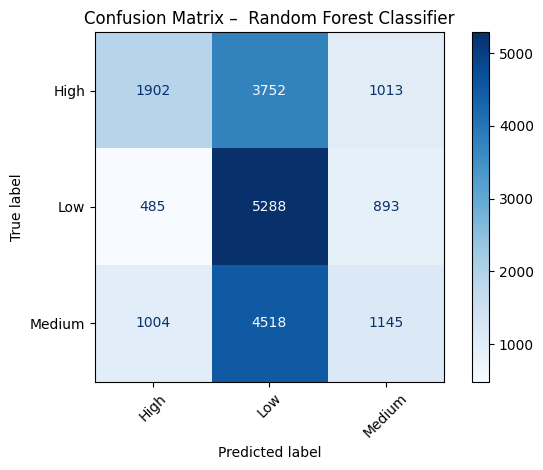

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    best_model_rfc,
    X_test_rfc,  # X_test_cls_selected
    y_test_cls,
    cmap='Blues',
    xticks_rotation=45
)
plt.title("Confusion Matrix –  Random Forest Classifier")
plt.tight_layout()
plt.show()


#### **4.2. Class-wise Error Distribution (Bar Plot)**

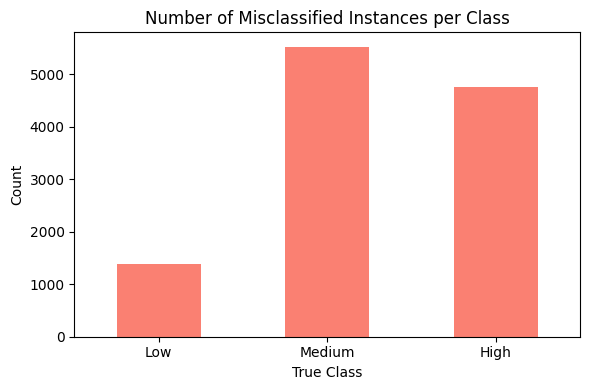

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Errors per class
errors_per_class = (y_pred_rfc != y_test_cls)
error_counts = pd.Series(y_test_cls[errors_per_class]).value_counts().sort_index()

# Bar plot
plt.figure(figsize=(6, 4))
error_counts.plot(kind='bar', color='salmon')
plt.title("Number of Misclassified Instances per Class")
plt.ylabel("Count")
plt.xlabel("True Class")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### **4.3. Actual vs. Predicted Class Distribution (Grouped Bar Chart)**

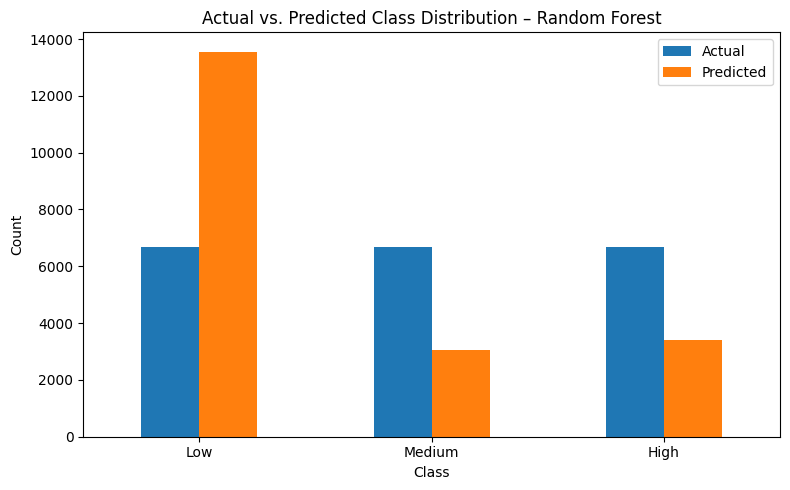

In [ ]:
import seaborn as sns

# Count predictions and actual values
pred_counts = pd.Series(y_pred_rfc, name="Predicted").value_counts().sort_index()
true_counts = pd.Series(y_test_cls, name="Actual").value_counts().sort_index()

# Combine into a DataFrame
comparison_df = pd.concat([true_counts, pred_counts], axis=1)
comparison_df.columns = ["Actual", "Predicted"]

# Grouped bar plot
comparison_df.plot(kind='bar', figsize=(8, 5))
plt.title("Actual vs. Predicted Class Distribution – Random Forest")
plt.ylabel("Count")
plt.xlabel("Class")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### **4.4. Misclassified Examples (Feature Context)**

In [ ]:
from IPython.display import display

# Create aligned predictions
y_pred_rfc_aligned = pd.Series(y_pred_rfc, index=y_test_cls.index)
error_mask = y_pred_rfc_aligned != y_test_cls

# Extract the error cases
errors_df = df_class_encoded.loc[y_test_cls.index[error_mask]].copy()
errors_df['True Label'] = y_test_cls[error_mask]
errors_df['Predicted Label'] = y_pred_rfc_aligned[error_mask]

# Display two examples with selected features
features_to_show = [col for col in selected_features_rfc if col in errors_df.columns]
print("Example Misclassified Cases:")
display(errors_df[['True Label', 'Predicted Label'] + features_to_show].sample(2, random_state=42))

Example Misclassified Cases:


,True Label,Predicted Label,Impressions,Audience Age,Age Group,Post Hour,Post DayOfWeek,Post Month,Platform_Instagram,Platform_LinkedIn,Platform_Twitter,Post Type_Link,Post Type_Video,Weekday Type_Weekend,Time Periods_Evening,Time Periods_Morning,Time Periods_Night,Audience Gender_Male,Audience Gender_Other,Audience Continent_Antarctica,Audience Continent_Asia,Audience Continent_Europe,Audience Continent_NorthAmerica,Audience Continent_Oceania,Audience Continent_SouthAmerica,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive
20944,Medium,Low,6873,57,2.0,5,5,7,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
89357,High,Medium,3586,46,2.0,1,5,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1






## ***PART C – Binary Classification (Improved Framing)***


To address the misclassification patterns observed in the three-class setup, particularly the ambiguity surrounding the Medium class, we introduced an alternative binary classification strategy. This method focused exclusively on the most extreme engagement cases (bottom and top quartiles) and excluded the ambiguous middle 50% of the data. This led to a balanced binary target variable (50% each), reduced class overlap, and improved predictive clarity. Performance metrics were recalculated and showed enhanced recall and F1-scores, especially in identifying high-engagement posts.






## **Data Preprocessing – Classification (Binary Framing of Extremes):**




To improve classification performance, we created a new binary target by keeping only the most extreme engagement cases:

* 0 for Low engagement (≤ Q1).

* 1 for High engagement (≥ Q3).

Posts in the middle 50% were removed to reduce ambiguity.

In [ ]:
# Copy the original dataset
df_binary = df.copy()

# Calculate Q1 and Q3 (25th and 75th percentiles)
Q1 = df_binary['Engagement Rate'].quantile(0.25)
Q3 = df_binary['Engagement Rate'].quantile(0.75)

# Label each observation based on its engagement level
def label_extremes(rate):
    if rate <= Q1:
        return 'Low'
    elif rate >= Q3:
        return 'High'
    else:
        return 'Mid'

df_binary['Engagement Level'] = df_binary['Engagement Rate'].apply(label_extremes)

# Keep only the 'Low' and 'High' classes, exclude the middle 50%
df_binary = df_binary[df_binary['Engagement Level'].isin(['Low', 'High'])].copy()

# Encode binary target: 0 = Low (Not Popular), 1 = High (Popular)
df_binary['Engagement Class'] = df_binary['Engagement Level'].apply(lambda x: 0 if x == 'Low' else 1)

# Verify the class distribution
print(df_binary['Engagement Class'].value_counts())


Engagement Class
1    25000
0    25000
Name: count, dtype: int64


### **1.	Resolving class imbalance (if applicable):**


To ensure reliable classification results, we checked whether the new binary target variable **(Engagement Class)** was evenly distributed. A balanced class distribution reduces the risk of model bias toward the majority class.

The results showed that both classes **(Low and High engagement)** are equally represented **(50% each)**, indicating no significant class imbalance, and therefore no correction was necessary.






In [ ]:
# Calculate count and percentage per class
engagement_dist = df_binary['Engagement Class'].value_counts().sort_index()
engagement_percent = (engagement_dist / len(df_binary)) * 100

# Combine into one DataFrame
engagement_summary = pd.DataFrame({
    'Count': engagement_dist,
    'Percentage': engagement_percent.round(2)
})

print("Engagement Class distribution:\n")
print(engagement_summary)

# flag imbalance
if engagement_percent.max() - engagement_percent.min() > 10:
    print("\n Warning: Potential class imbalance detected.")
else:
    print("\n No significant class imbalance.")

Engagement Class distribution:

                  Count  Percentage
Engagement Class                   
0                 25000        50.0
1                 25000        50.0

 No significant class imbalance.


### **2.	Encoding Categorical Variables:**


To enable machine learning models to interpret categorical data, we applied appropriate encoding techniques:

- **Ordinal Encoding**: Used for ordered categories such as *Age Group* (Adolescent Adults < Mature Adults < Senior Adults).
- **One-Hot Encoding**: Used for nominal variables with no inherent order (e.g., Platform, Post Type, Sentiment).

We also ensured all missing values in the *Age Group* column were filled with the lowest meaningful category prior to encoding.




In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal Encoding
"""
Applies ordinal encoding to a categorical column based on a defined order.
Parameters:
  df (DataFrame): The input dataset.
  feature_name (str): The column to encode.
  category_order (list): Ordered categories (low to high).

Returns:
  DataFrame: The updated dataset with the column encoded.

Notes:
  Skips encoding if the column is missing, already encoded, or has unexpected values.
"""
def safe_ordinal_encode(df, feature_name, category_order):
    if feature_name not in df.columns:
        print(f" Column '{feature_name}' not found – skipping encoding.")
        return df

    df[feature_name] = df[feature_name].astype(str)
    unique_values = set(df[feature_name].unique())
    expected_values = set(category_order)

    if unique_values <= expected_values:
        encoder = OrdinalEncoder(categories=[category_order])
        df[feature_name] = encoder.fit_transform(df[[feature_name]])
        print(f" '{feature_name}' encoded successfully.")
    elif unique_values <= set(['0.0', '1.0', '2.0']):
        print(f" '{feature_name}' appears to be already encoded – skipping.")
    else:
        print(f" Unexpected values in '{feature_name}': {unique_values - expected_values}")
        print("Encoding skipped to avoid incorrect transformation.")
    return df

# One-Hot Encoding
"""
Applies one-hot encoding to selected categorical columns.
Parameters:
  df (DataFrame): The input dataset.
  columns_to_encode (list): List of columns to encode.
  drop_first (bool): Drop the first category to avoid multicollinearity.

Returns:
 DataFrame: The updated dataset with one-hot encoded columns.

Notes:
  Ignores missing columns and returns the original dataset if none are valid.
"""
def safe_one_hot_encode(df, columns_to_encode, drop_first=True):
    valid_columns = [col for col in columns_to_encode if col in df.columns]
    if not valid_columns:
        print(" No valid categorical columns found for one-hot encoding.")
        return df
    df_encoded = pd.get_dummies(df, columns=valid_columns, drop_first=drop_first, dtype=int)
    print(f" One-hot encoding completed for: {valid_columns}")
    return df_encoded


# Apply Ordinal Encoding to Age Group
age_group_order = ['Adolescent Adults', 'Mature Adults', 'Senior Adults']
df_binary = safe_ordinal_encode(df_binary, 'Age Group', age_group_order)


# Define categorical columns to encode
one_hot_features = [
    'Platform', 'Post Type', 'Weekday Type', 'Time Periods',
    'Audience Gender', 'Audience Continent', 'Sentiment'
]

# Apply safe one-hot encoding
df_binary_encoded = safe_one_hot_encode(df_binary, one_hot_features)

#  Final output
print("Encoding completed successfully. Encoded dataframe shape:", df_binary_encoded.shape)
print(df_binary_encoded.head())


 'Age Group' encoded successfully.
 One-hot encoding completed for: ['Platform', 'Post Type', 'Weekday Type', 'Time Periods', 'Audience Gender', 'Audience Continent', 'Sentiment']
Encoding completed successfully. Encoded dataframe shape: (50000, 29)
    Impressions  Engagement Rate  Audience Age  Age Group  Post Hour  \
0          3884        91.414554            48        2.0          6   
3          4829        70.951344            48        2.0         15   
7          4631        59.900990            18        0.0          5   
9          4242        64.902507            47        2.0         10   
14         1828        75.952045            19        0.0         20   

    Post DayOfWeek  Post Month Engagement Level  Engagement Class  \
0                6           7             High                 1   
3                3           5             High                 1   
7                5           8             High                 1   
9                6           7           

### **3.	Train/Test Splitting Strategy (Binary Classification):**



To evaluate model performance on unseen data, the binary classification dataset was split as follows:

* Training Set (80%): Used for model training and hyperparameter tuning.

* Test Set (20%): Used to assess generalization performance.

Stratified sampling was applied to maintain a 50/50 class distribution between Low- and high-engagement posts.

In [ ]:
from sklearn.model_selection import train_test_split

X_cls = df_binary_encoded.drop(columns=['Engagement Class', 'Engagement Rate', 'Engagement Level'])
y_cls = df_binary_encoded['Engagement Class']

In [ ]:
# Split into training (80%) and test (20%) sets
from sklearn.model_selection import train_test_split

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, stratify=y_cls, random_state=42
)

# Output the number of samples
print(f"Training samples: {X_train_cls.shape[0]}")
print(f"Test samples: {X_test_cls.shape[0]}")


Training samples: 40000
Test samples: 10000


### **4.	Standardizing the data (Binary Classification):**


Numeric features were standardized to ensure they have a mean of 0 and a standard deviation of 1.
This prevents scale-sensitive models from being biased by differences in feature magnitude.
To avoid data leakage, the scaler was fit on the training set only and then applied to both the training and test sets.







In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training set and transform both sets
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

# Convert back to DataFrames for readability
X_train_cls_scaled = pd.DataFrame(X_train_cls_scaled, columns=X_train_cls.columns)
X_test_cls_scaled = pd.DataFrame(X_test_cls_scaled, columns=X_test_cls.columns)


## **Feature Engineering and Selection (Binary Classification):**


To reduce dimensionality and improve model performance, we applied feature selection using RFECV
(Recursive Feature Elimination with Cross-Validation) With a Random Forest classifier.

This technique iteratively removes the least important features while evaluating model accuracy,
helping retain only the most informative predictors.

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Base model – supports feature_importances_
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Recursive Feature Elimination with CV
selector = RFECV(
    estimator=rf_model,
    step=1,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

# Fit on training data
selector.fit(X_train_cls_scaled, y_train_cls)

# Apply selection to X
X_train_cls_selected = selector.transform(X_train_cls_scaled)
X_test_cls_selected = selector.transform(X_test_cls_scaled)

# Retrieve selected feature names
selected_feature_names_cls = X_train_cls_scaled.columns[selector.support_]

# Remove 'Engagement Rate' if mistakenly included
selected_feature_names_cls = selected_feature_names_cls.drop('Engagement Rate', errors='ignore')

# Final selection
X_train_cls_selected = X_train_cls_scaled[selected_feature_names_cls]
X_test_cls_selected = X_test_cls_scaled[selected_feature_names_cls]

print("\nFeature selection completed.")
print(f"\nNumber of selected features: {len(selected_feature_names_cls)}")
print("\nSelected features:")
print(selected_feature_names_cls.tolist())



Feature selection completed.

Number of selected features: 25

Selected features:
['Impressions', 'Audience Age', 'Age Group', 'Post Hour', 'Post DayOfWeek', 'Post Month', 'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Twitter', 'Post Type_Link', 'Post Type_Video', 'Weekday Type_Weekend', 'Time Periods_Evening', 'Time Periods_Morning', 'Time Periods_Night', 'Audience Gender_Male', 'Audience Gender_Other', 'Audience Continent_Asia', 'Audience Continent_Europe', 'Audience Continent_NorthAmerica', 'Audience Continent_Oceania', 'Audience Continent_SouthAmerica', 'Sentiment_Negative', 'Sentiment_Neutral', 'Sentiment_Positive']



## **Modelling Experiments (Binary Classification):**


### **1. Logistic Regression:**








In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Pipeline
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# Hyperparameter tuning range
param_grid_lr = {
    'lr__C': [0.01, 0.1, 1, 10],
    'lr__penalty': ['l2']
}

# GridSearchCV
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid_lr, scoring='accuracy', cv=5, n_jobs=-1)
grid_lr.fit(X_train_cls_selected, y_train_cls)

# Results
print("Logistic Regression - Best Parameters:")
print(grid_lr.best_params_)

y_pred_lr = grid_lr.predict(X_test_cls_selected)

print("\nAccuracy:", accuracy_score(y_test_cls, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_lr))

# Saving for evaluation
best_model_lr = grid_lr.best_estimator_
selected_features_lr = selected_feature_names_cls
X_train_lr = X_train_cls_selected
X_test_lr = X_test_cls_selected


Logistic Regression - Best Parameters:
{'lr__C': 0.01, 'lr__penalty': 'l2'}

Accuracy: 0.5875

Confusion Matrix:
 [[2855 2145]
 [1980 3020]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.57      0.58      5000
           1       0.58      0.60      0.59      5000

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.59     10000
weighted avg       0.59      0.59      0.59     10000



### **2. RandomForestClassifier:**








In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Pipeline
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Hyperparameter tuning rang
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5]
}

# GridSearchCV
grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid_rf, scoring='accuracy', cv=5, n_jobs=-1)
grid_rf.fit(X_train_cls_selected, y_train_cls)

# Results
print("Random Forest - Best Parameters:")
print(grid_rf.best_params_)

y_pred_rfc = grid_rf.predict(X_test_cls_selected)

print("\nAccuracy:", accuracy_score(y_test_cls, y_pred_rfc))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_rfc))
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_rfc))

# Saving for evaluation
best_model_rfc = grid_rf.best_estimator_
selected_features_rfc = selected_feature_names_cls
X_train_rfc = X_train_cls_selected
X_test_rfc = X_test_cls_selected


Random Forest - Best Parameters:
{'rf__max_depth': 10, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}

Accuracy: 0.6291

Confusion Matrix:
 [[4383  617]
 [3092 1908]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.88      0.70      5000
           1       0.76      0.38      0.51      5000

    accuracy                           0.63     10000
   macro avg       0.67      0.63      0.60     10000
weighted avg       0.67      0.63      0.60     10000




## **Model Evaluation (Binary Classification):**


### **1. Metric Selection:**

For the classification task, we selected the following evaluation metrics:

- **Accuracy**: Measures the proportion of correctly predicted instances among the total samples. It is a useful metric when all classes are equally important.

- **Precision (Macro)**: Indicates how many of the predicted positives for each class were actually correct. Useful when the cost of false positives is high.

- **Recall (Macro)**: Measures the proportion of actual positives that were correctly identified. It is especially relevant when false negatives are costly.

- **F1-Score (Macro)**: The harmonic mean of precision and recall. It provides a balanced measure that is robust to class imbalance.

- **ROC-AUC (Macro, One-vs-Rest)**: Evaluates the model's ability to discriminate between classes. A higher score indicates better separability among the classes.

These metrics collectively provide a robust evaluation of classification performance across all classes.









### **2. Results Reporting:**


We evaluated two classification models using the selected metrics.
The table below presents their performance scores on the test set.









In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from IPython.display import display

# Evaluation metrics for logistic regression
start_lr = time.time()
y_pred_lr = grid_lr.predict(X_test_cls_selected)
y_proba_lr = grid_lr.predict_proba(X_test_cls_selected)

acc_lr = accuracy_score(y_test_cls, y_pred_lr)
prec_lr = precision_score(y_test_cls, y_pred_lr, average='macro')
recall_lr = recall_score(y_test_cls, y_pred_lr, average='macro')
f1_lr = f1_score(y_test_cls, y_pred_lr, average='macro')
auc_lr = roc_auc_score(pd.get_dummies(y_test_cls), y_proba_lr, multi_class='ovr', average='macro')
runtime_lr = time.time() - start_lr

# Evaluation metrics for Random Forest
start_rf = time.time()
y_pred_rf = grid_rf.predict(X_test_cls_selected)
y_proba_rf = grid_rf.predict_proba(X_test_cls_selected)

acc_rf = accuracy_score(y_test_cls, y_pred_rf)
prec_rf = precision_score(y_test_cls, y_pred_rf, average='macro')
recall_rf = recall_score(y_test_cls, y_pred_rf, average='macro')
f1_rf = f1_score(y_test_cls, y_pred_rf, average='macro')
auc_rf = roc_auc_score(pd.get_dummies(y_test_cls), y_proba_rf, multi_class='ovr', average='macro')
runtime_rf = time.time() - start_rf

results_df_cls = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [round(acc_lr, 3), round(acc_rf, 3)],
    'Precision': [round(prec_lr, 3), round(prec_rf, 3)],
    'Recall': [round(recall_lr, 3), round(recall_rf, 3)],
    'F1-Score': [round(f1_lr, 3), round(f1_rf, 3)],
    'ROC-AUC': [round(auc_lr, 3), round(auc_rf, 3)],
    'Runtime (s)': [round(runtime_lr, 3), round(runtime_rf, 3)]
})

print("Performance table for classification models:")
display(results_df_cls)


Performance table for classification models:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Runtime (s)
0,Logistic Regression,0.588,0.588,0.587,0.587,0.643,0.024
1,Random Forest,0.629,0.671,0.629,0.605,0.642,0.373


### **3. Statistical Insight - Target Distribution:**

We used the McNemar Test to evaluate whether the difference in performance between classification models
(Logistic Regression and Random Forest) is statistically significant.
This test compares matched predictions on the same test set.













#### **3.1.Accuracy**

In [ ]:
#Comparing accuracy of two models using the McNemar Test
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Build a success/failure contingency table for each model
correct_lr = (y_pred_lr == y_test_cls)
correct_rf = (y_pred_rfc == y_test_cls)

# Contingency table
#            RF Correct
#           Yes     No
# LR Yes   [A]     [B]
# LR No    [C]     [D]
A = np.sum(correct_lr & correct_rf)
B = np.sum(correct_lr & ~correct_rf)
C = np.sum(~correct_lr & correct_rf)
D = np.sum(~correct_lr & ~correct_rf)

# Frequency
contingency_table = [[A, B], [C, D]]

# McNemar Test
result = mcnemar(contingency_table, exact=True)

print("\nMcNemar Test Results – Accuracy")
print("\nStatistic:", result.statistic)
print("\np-value:", result.pvalue)

# Verbal explanation
if result.pvalue < 0.05:
    print("\nThe differences in Accuracy between models are statistically significant (p < 0.05)")
else:
    print("\nNo significant difference in Accuracy (p ≥ 0.05)")


McNemar Test Results – Accuracy

Statistic: 1114.0

p-value: 6.10137659124925e-16

The differences in Accuracy between models are statistically significant (p < 0.05)


#### **3.2.Precision – Class: 'High'**

In [ ]:
# Comparison of Precision using the McNemar Test:
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import precision_score
import numpy as np


target_label = 'High'

# Correct classifications based on Precision: whether the model’s predicted label matches the true label
pred_lr_pos = (y_pred_lr == target_label)
pred_rf_pos = (y_pred_rfc == target_label)
true_pos = (y_test_cls == target_label)

correct_prec_lr = pred_lr_pos & true_pos
correct_prec_rf = pred_rf_pos & true_pos

# Frequency table
A = np.sum(correct_prec_lr & correct_prec_rf)
B = np.sum(correct_prec_lr & ~correct_prec_rf)
C = np.sum(~correct_prec_lr & correct_prec_rf)
D = np.sum(~correct_prec_lr & ~correct_prec_rf)

contingency_table = [[A, B], [C, D]]

# McNemar Test
result = mcnemar(contingency_table, exact=True)

print("\nMcNemar Test – Precision (class: High)")
print("\nStatistic:", result.statistic)
print("\np-value:", result.pvalue)

# Verbal explanation
if result.pvalue < 0.05:
    print(f"\nThe differences in Precision for class '{target_label}' are statistically significant (p < 0.05)")
else:
    print(f"\nNo significant difference in Precision for class '{target_label}' (p ≥ 0.05)")


McNemar Test – Precision (class: High)

Statistic: 0.0

p-value: 1.0

No significant difference in Precision for class 'High' (p ≥ 0.05)


#### **3.3.Recall – Class: 'High'**

In [ ]:
# Comparison of Recall using the McNemar Test:
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import recall_score
import numpy as np


# Define the target label to evaluate
target_label = 'High'

# Identify true labels of the target class
true_label = (y_test_cls == target_label)

# Identify model predictions for the target class
pred_lr = (y_pred_lr == target_label)
pred_rf = (y_pred_rfc == target_label)

# Recall = of the samples that truly belong to the class, how many did the model detect?
recall_hit_lr = pred_lr & true_label
recall_hit_rf = pred_rf & true_label

# Build contingency table
A = np.sum(recall_hit_lr & recall_hit_rf)
B = np.sum(recall_hit_lr & ~recall_hit_rf)
C = np.sum(~recall_hit_lr & recall_hit_rf)
D = np.sum(~recall_hit_lr & ~recall_hit_rf)

contingency_table = [[A, B], [C, D]]

# Run McNemar Test
result = mcnemar(contingency_table, exact=True)

# Print results
print(f"\nMcNemar Test – Recall (class: '{target_label}')")
print("\nStatistic:", result.statistic)
print("\np-value:", result.pvalue)

if result.pvalue < 0.05:
    print(f"\nThe differences in Recall for class '{target_label}' are statistically significant (p < 0.05)")
else:
    print(f"\nNo significant difference in Recall for class '{target_label}' (p ≥ 0.05)")



McNemar Test – Recall (class: 'High')

Statistic: 0.0

p-value: 1.0

No significant difference in Recall for class 'High' (p ≥ 0.05)


### **4. Error & Residual Analysis:**


To better understand the prediction behavior of the best-performing model (Random Forest), we analyzed classification errors from several perspectives: confusion matrix, error distribution, prediction comparison, and sample misclassifications.















#### **4.1.Confusion Matrix**

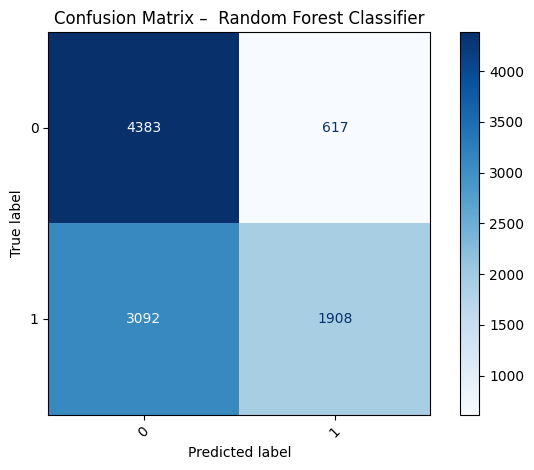

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    best_model_rfc,
    X_test_rfc,  # X_test_cls_selected
    y_test_cls,
    cmap='Blues',
    xticks_rotation=45
)
plt.title("Confusion Matrix –  Random Forest Classifier")
plt.tight_layout()
plt.show()


#### **4.2. Class-wise Error Distribution (Bar Plot)**

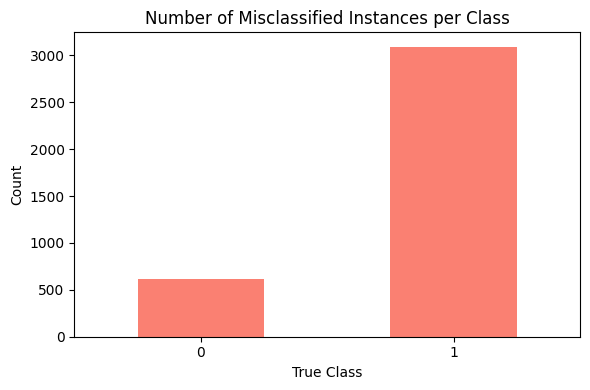

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Errors per class
errors_per_class = (y_pred_rfc != y_test_cls)
error_counts = pd.Series(y_test_cls[errors_per_class]).value_counts().sort_index()

# Bar plot
plt.figure(figsize=(6, 4))
error_counts.plot(kind='bar', color='salmon')
plt.title("Number of Misclassified Instances per Class")
plt.ylabel("Count")
plt.xlabel("True Class")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### **4.3. Actual vs. Predicted Class Distribution (Grouped Bar Chart)**

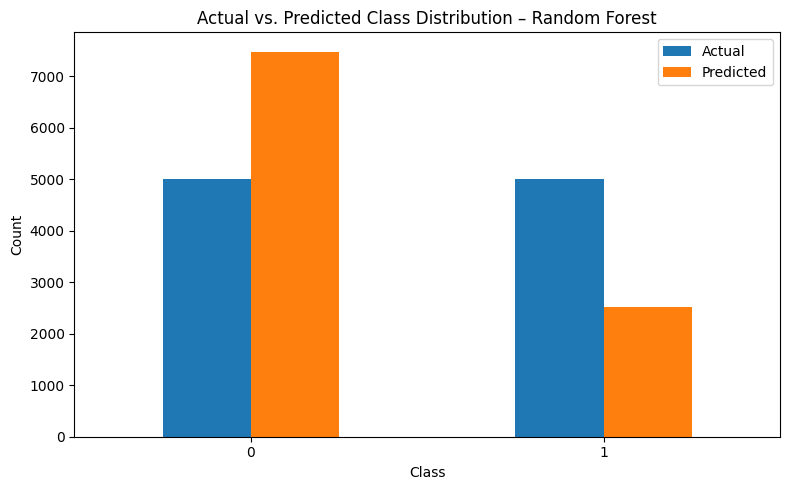

In [ ]:
import seaborn as sns

# Count predictions and actual values
pred_counts = pd.Series(y_pred_rfc, name="Predicted").value_counts().sort_index()
true_counts = pd.Series(y_test_cls, name="Actual").value_counts().sort_index()

# Combine into a DataFrame
comparison_df = pd.concat([true_counts, pred_counts], axis=1)
comparison_df.columns = ["Actual", "Predicted"]

# Grouped bar plot
comparison_df.plot(kind='bar', figsize=(8, 5))
plt.title("Actual vs. Predicted Class Distribution – Random Forest")
plt.ylabel("Count")
plt.xlabel("Class")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### **4.4. Misclassified Examples (Feature Context)**

In [ ]:
from IPython.display import display

# Create aligned predictions
y_pred_rfc_aligned = pd.Series(y_pred_rfc, index=y_test_cls.index)
error_mask = y_pred_rfc_aligned != y_test_cls

# Extract the error cases
errors_df = df_binary_encoded.loc[y_test_cls.index[error_mask]].copy()
errors_df['True Label'] = y_test_cls[error_mask]
errors_df['Predicted Label'] = y_pred_rfc_aligned[error_mask]

# Display two examples with selected features
features_to_show = [col for col in selected_features_rfc if col in errors_df.columns]
print("Example Misclassified Cases:")
display(errors_df[['True Label', 'Predicted Label'] + features_to_show].sample(2, random_state=42))

Example Misclassified Cases:


,True Label,Predicted Label,Impressions,Audience Age,Age Group,Post Hour,Post DayOfWeek,Post Month,Platform_Instagram,Platform_LinkedIn,Platform_Twitter,Post Type_Link,Post Type_Video,Weekday Type_Weekend,Time Periods_Evening,Time Periods_Morning,Time Periods_Night,Audience Gender_Male,Audience Gender_Other,Audience Continent_Asia,Audience Continent_Europe,Audience Continent_NorthAmerica,Audience Continent_Oceania,Audience Continent_SouthAmerica,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive
35658,1,0,4378,25,0.0,9,6,10,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
32777,1,0,8195,63,2.0,4,1,3,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0
